In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
from tqdm import tqdm
import pandas as pd
from scipy import sparse


In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv') 

In [3]:
df.shape

(100000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Signification des variables

#### 1. Gender (Genre) 
Le sexe de l'individu, généralement représenté par 'Homme' ou 'Femme'. Cette variable permet d'explorer les différences liées au genre dans la survenue du diabète.

#### 2. Age (Âge) 
L'âge de l'individu, souvent lié au risque de diabète. Les personnes plus âgées ont un risque plus élevé de développer le diabète en raison de facteurs liés à l'âge.

#### 3. Hypertension 
Une variable binaire (0 ou 1) indiquant si l'individu a des antécédents d'hypertension artérielle. L'hypertension est un facteur de risque pour le diabète et d'autres maladies cardiovasculaires.

#### 4. Heart Disease (Maladie cardiaque) 
Une variable binaire (0 ou 1) indiquant si l'individu a des antécédents de maladies cardiaques. Les maladies cardiaques sont également un facteur de risque important pour le diabète.

#### 5. Smoking History (Antécédents de tabagisme) 
Une variable catégorielle indiquant le statut tabagique de l'individu. Cela peut inclure des catégories comme 'Jamais fumé', 'Ancien fumeur', ou 'Fumeur actuel'. Le tabagisme est un facteur de risque du diabète et des maladies cardiovasculaires.

#### 6. BMI (IMC) 
L'Indice de Masse Corporelle (IMC), un indice numérique dérivé de la taille et du poids d'un individu. Un IMC élevé est un facteur de risque courant du diabète, en particulier du diabète de type 2.

#### 7. HbA1c Level (Taux d'HbA1c) 
Le taux d'Hémoglobine A1c, un marqueur utilisé pour diagnostiquer et suivre le diabète. Il fournit une moyenne des niveaux de glucose dans le sang au cours des deux à trois derniers mois. Un taux élevé d'HbA1c indique un mauvais contrôle du glucose et un risque accru de diabète.

#### 8. Blood Glucose Level (Niveau de glucose sanguin) 
Le niveau de glucose mesuré à un moment donné. Un taux élevé de glucose sanguin est un indicateur direct du diabète ou du prédiabète.

#### 9. Diabetes (Diabète) 
La variable cible, généralement binaire (0 ou 1), indiquant si l'individu a été diagnostiqué avec le diabète. Cette variable est utilisée dans les modèles de classification pour prédire le risque de diabète en fonction des autres caractéristiques.



In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:

# Codage binaire de la variable 'gender'
df['gender_encoded'] = df['gender'].map({'Male': 0, 'Female': 1})

In [10]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded
0,Female,80.0,0,1,never,25.19,6.6,140,0,1.0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,1.0
2,Male,28.0,0,0,never,27.32,5.7,158,0,0.0
3,Female,36.0,0,0,current,23.45,5.0,155,0,1.0
4,Male,76.0,1,1,current,20.14,4.8,155,0,0.0


In [11]:
df = df.drop(columns=['gender'])

In [12]:
df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded
0,80.0,0,1,never,25.19,6.6,140,0,1.0
1,54.0,0,0,No Info,27.32,6.6,80,0,1.0
2,28.0,0,0,never,27.32,5.7,158,0,0.0
3,36.0,0,0,current,23.45,5.0,155,0,1.0
4,76.0,1,1,current,20.14,4.8,155,0,0.0


<Axes: xlabel='smoking_history', ylabel='count'>

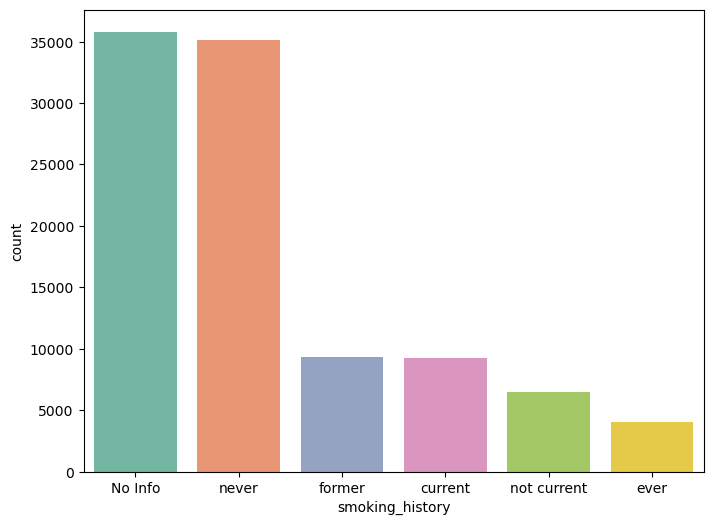

In [13]:
# Visualisation avec seaborn

import seaborn as sns
plt.figure(figsize=(8, 6))
# Compter les occurrences de chaque catégorie
smoking_counts = df['smoking_history'].value_counts()
sns.countplot(x='smoking_history', data=df, order=smoking_counts.index, palette='Set2')


On pourrait supprimer le variable smoking a cause du manque d'info sur 1/3 de la populatio




Text(0, 0.5, 'Nombre de cas')

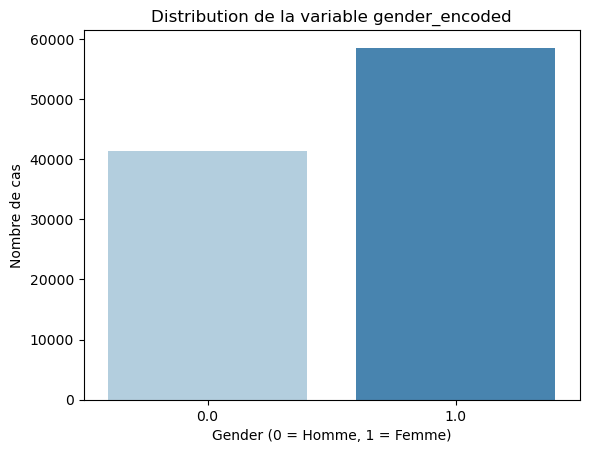

In [14]:
sns.countplot(x='gender_encoded', data=df, palette="Blues")

# Ajouter des étiquettes et un titre
plt.title('Distribution de la variable gender_encoded')
plt.xlabel('Gender (0 = Homme, 1 = Femme)')
plt.ylabel('Nombre de cas')

Y a pratiquement autant d'hommme que de femme. Aucun risque de biais

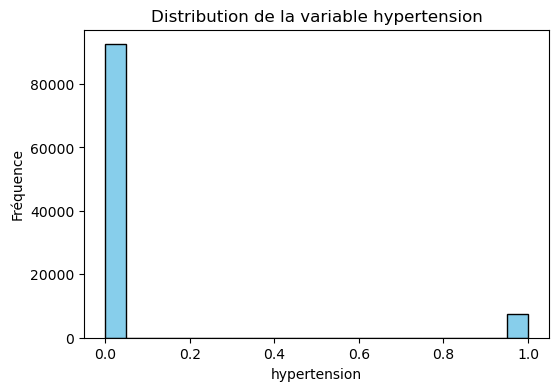

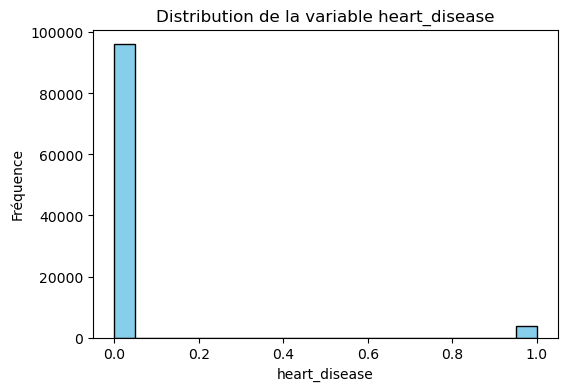

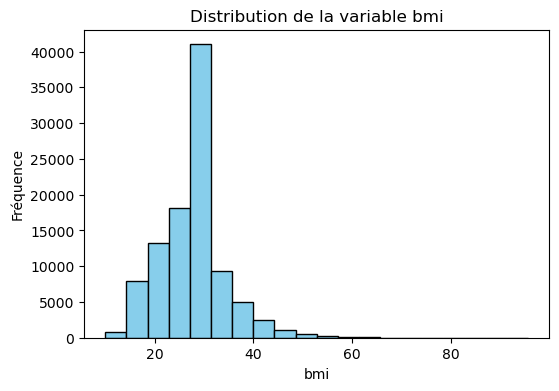

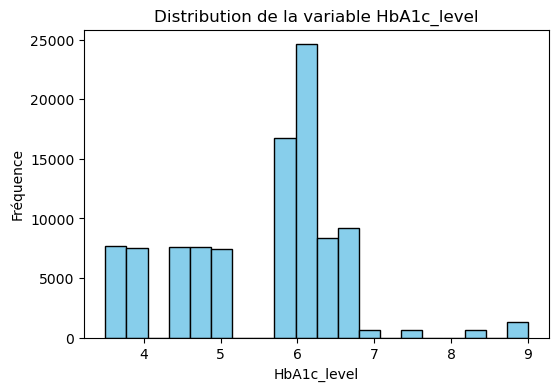

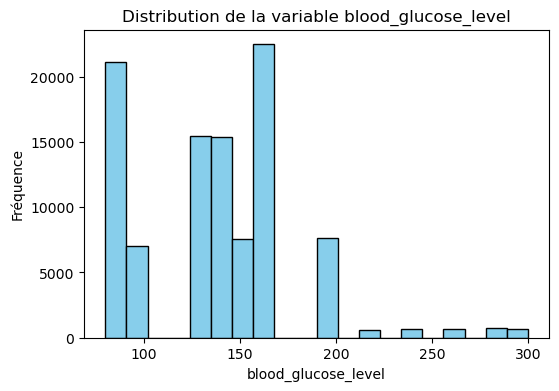

In [15]:
# Liste des colonnes à visualiser
columns_to_plot = [ 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Afficher un countplot pour chaque variable
for col in columns_to_plot:
    plt.figure(figsize=(6,4))
    
    if df[col].dtype == 'object':  # Pour les variables catégorielles
        sns.countplot(x=col, data=df, palette="Blues")
        plt.title(f'Distribution de la variable {col}')
        plt.xlabel(col)
        plt.ylabel('Nombre de cas')
    else:  # Pour les variables numériques, afficher un histogramme
        df[col].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Distribution de la variable {col}')
        plt.xlabel(col)
        plt.ylabel('Fréquence')
    
    plt.show()

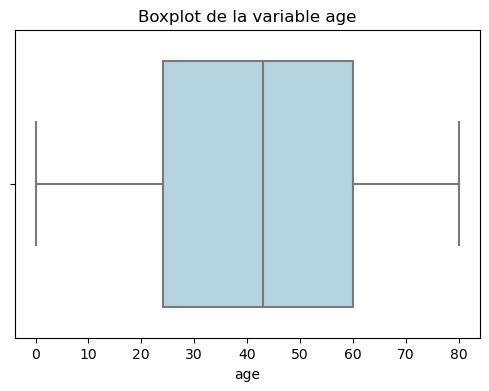

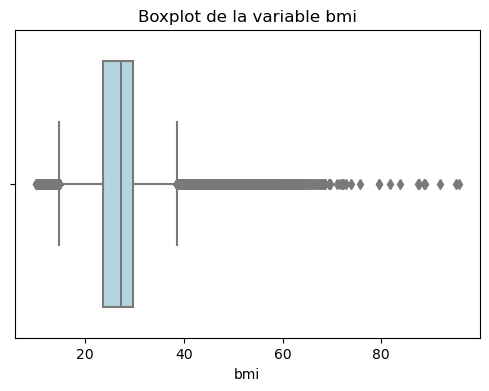

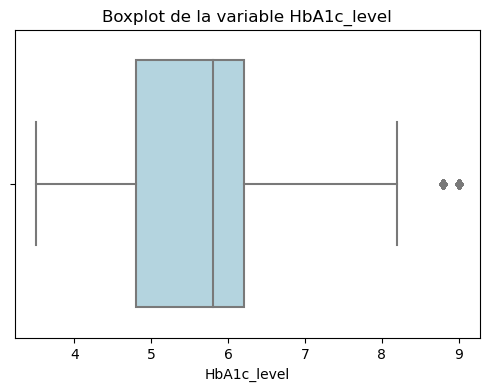

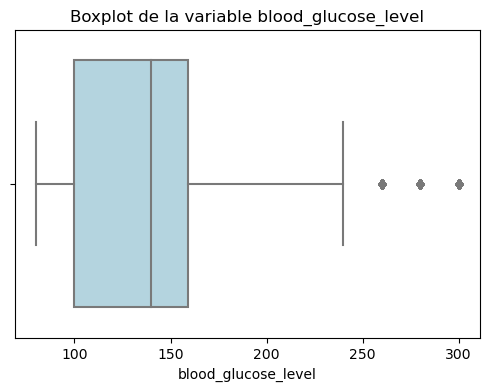

In [16]:
# Tracer les boxplots
columns_to_plot = [ 'age','bmi', 'HbA1c_level', 'blood_glucose_level']
for col in columns_to_plot:
    plt.figure(figsize=(6,4))
    
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot de la variable {col}')
    plt.xlabel(col)
    
    plt.show()

Text(0, 0.5, 'Nombre de cas')

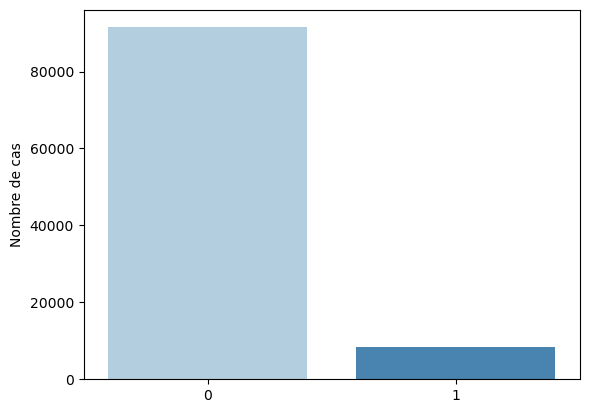

In [17]:
sns.countplot(x='diabetes', data=df, palette="Blues")

# Ajouter des étiquettes et un titre
plt.title('')
plt.xlabel('')
plt.ylabel('Nombre de cas')

Il va falloir se rassurer d'une bonne repartiition lors de la création des train set et des test set

In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialiser le LabelEncoder
label_encoder = LabelEncoder()

# Appliquer le LabelEncoder à la colonne 'smoking_history'
df['smoking_history_encoded'] = label_encoder.fit_transform(df['smoking_history'])

# Afficher les résultats
print(df[['smoking_history','smoking_history_encoded']].head())


  smoking_history  smoking_history_encoded
0           never                        4
1         No Info                        0
2           never                        4
3         current                        1
4         current                        1


In [19]:

df['smoking_history_encoded'].unique()
df['smoking_history_encoded'] = pd.to_numeric(df['smoking_history_encoded'], errors='coerce')

In [20]:
df = df.drop(columns=['smoking_history'])

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
correlation_matrix = df.corr()



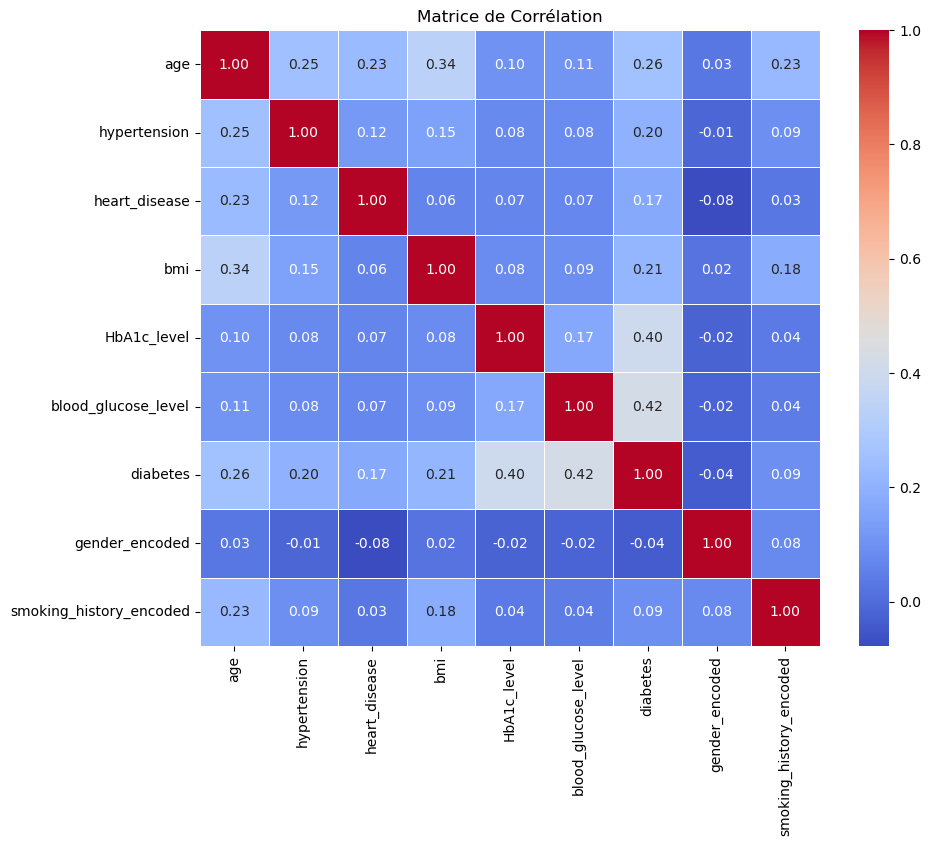

In [22]:
# Affichage de la heatmap
plt.figure(figsize=(10, 8))  # Taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Affichage du graphique
plt.title('Matrice de Corrélation')
plt.show()


#### Etant donnée la faible relation entre la variable diabète et les variable gender et smoking hisstory, nous allons les considérer comme variable non significatif dans la suite de notre travail

In [23]:
data=df.drop (columns=['smoking_history_encoded', 'gender_encoded'])

In [24]:
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


Separons les variables en deux 

In [25]:
# Séparer les variables explicatives (features) et la variable cible (target)
x = data.drop(columns=['diabetes'])
y = data['diabetes']

# Vérifier les dimensions des nouveaux DataFrames
print("Dimensions de X:", x.shape)
print("Dimensions de y:", y.shape)

Dimensions de X: (100000, 6)
Dimensions de y: (100000,)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) 

In [27]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit (x_train,y_train)
print('Train score:' ,model.score (x_train , y_train))
print('Test score:' ,model.score (x_test , y_test))

Train score: 0.9701
Test score: 0.9546


In [28]:
# Normaliser les caractéristiques
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Créer et entraîner le modèle KNeighborsClassifier
for n in range(1, 12):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train, y_train)
    
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    
    print(f'n_neighbors={n}')
    print('Train score:', train_score)
    print('Test score:', test_score)
    print('---------------------------')

n_neighbors=1
Train score: 0.9965125
Test score: 0.95205
---------------------------
n_neighbors=2
Train score: 0.9752
Test score: 0.96475
---------------------------
n_neighbors=3
Train score: 0.9756625
Test score: 0.96195
---------------------------
n_neighbors=4
Train score: 0.9716875
Test score: 0.9643
---------------------------
n_neighbors=5
Train score: 0.9723875
Test score: 0.96465
---------------------------
n_neighbors=6
Train score: 0.9704125
Test score: 0.96565
---------------------------
n_neighbors=7
Train score: 0.9707875
Test score: 0.9652
---------------------------
n_neighbors=8
Train score: 0.9693375
Test score: 0.96545
---------------------------
n_neighbors=9
Train score: 0.970175
Test score: 0.9656
---------------------------
n_neighbors=10
Train score: 0.9687625
Test score: 0.9656
---------------------------
n_neighbors=11
Train score: 0.969325
Test score: 0.9655
---------------------------


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

In [31]:
parametre_Grid ={'n_neighbors': np.arange(1,50),'metric':['euclidean','manhattan']}


In [32]:
grid=GridSearchCV(KNeighborsClassifier(),parametre_Grid,cv=5)


In [33]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [34]:
 grid.best_score_

0.9666

In [35]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 17}

In [36]:
model=grid.best_estimator_

In [37]:
model.score (x_test,y_test)

0.96475

## Arbre de decision

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialiser le modèle d'arbre de décision
dt_model = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle avec les données d'entraînement
dt_model.fit(x_train, y_train)

# Prédire les résultats sur les données de test
y_pred = dt_model.predict(x_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

# Afficher un rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))


Précision du modèle : 0.95
Rapport de classification :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18285
           1       0.73      0.72      0.72      1715

    accuracy                           0.95     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000



In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Définir l'arbre de décision
dt_model = DecisionTreeClassifier(random_state=42)

# Définir la grille des hyperparamètres
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurer GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='accuracy',  # Utiliser la précision comme métrique
    cv=5,  # Validation croisée avec 5 plis
    verbose=2,
    n_jobs=-1  # Utilisation parallèle pour accélérer les calculs
)

# Effectuer la recherche sur les données d'entraînement
grid_search.fit(x_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Évaluer les performances du modèle optimisé
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print(f"Précision du modèle optimisé : {accuracy_score(y_test, y_pred):.2f}")
print("Rapport de classification :")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Meilleurs hyperparamètres : {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Précision du modèle optimisé : 0.97
Rapport de classification :
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18285
           1       1.00      0.66      0.79      1715

    accuracy                           0.97     20000
   macro avg       0.98      0.83      0.89     20000
weighted avg       0.97      0.97      0.97     20000



### SVM

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Définir un modèle de base
svm_model = SVC(random_state=42)

# Grille des hyperparamètres
param_grid = {
    'C': [0.1, 1, 10, 100],       # Paramètre de régularisation
    'kernel': ['linear', 'rbf'],  # Type de noyau
    'gamma': ['scale', 'auto', 0.1, 1, 10]  # Largeur pour le noyau RBF
}

# Configuration de GridSearchCV
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # Validation croisée
    verbose=2,
    n_jobs=-1
)

# Entraîner le modèle
grid_search.fit(x_train_scaled, y_train)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Évaluer le modèle optimisé
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(x_test_scaled)

print(f"Précision du modèle optimisé : {accuracy_score(y_test, y_pred):.2f}")
print("Rapport de classification :")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Meilleurs hyperparamètres : {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Précision du modèle optimisé : 0.97
Rapport de classification :
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18285
           1       0.98      0.66      0.79      1715

    accuracy                           0.97     20000
   macro avg       0.97      0.83      0.88     20000
weighted avg       0.97      0.97      0.97     20000



In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modèle de Bagging avec un arbre de décision comme modèle de base
bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging_model.fit(x_train, y_train)  # Entraînement

# Prédictions
y_pred_bagging = bagging_model.predict(x_test)

# Évaluation
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Accuracy:", accuracy_bagging)
print("Classification Report:\n", classification_report(y_test, y_pred_bagging))


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 0.9671
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18285
           1       0.91      0.69      0.78      1715

    accuracy                           0.97     20000
   macro avg       0.94      0.84      0.88     20000
weighted avg       0.97      0.97      0.97     20000



In [46]:
from sklearn.ensemble import GradientBoostingClassifier

# Modèle de Gradient Boosting
boosting_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
boosting_model.fit(x_train, y_train)  # Entraînement

# Prédictions
y_pred_boosting = boosting_model.predict(x_test)

# Évaluation
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print("Boosting Accuracy:", accuracy_boosting)
print("Classification Report:\n", classification_report(y_test, y_pred_boosting))


Boosting Accuracy: 0.9704
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18285
           1       1.00      0.66      0.79      1715

    accuracy                           0.97     20000
   macro avg       0.98      0.83      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [47]:
from sklearn.ensemble import AdaBoostClassifier

# Modèle AdaBoost avec des arbres de décision faibles
adaboost_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)
adaboost_model.fit(x_train, y_train)  # Entraînement

# Prédictions
y_pred_adaboost = adaboost_model.predict(x_test)

# Évaluation
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("AdaBoost Accuracy:", accuracy_adaboost)
print("Classification Report:\n", classification_report(y_test, y_pred_adaboost))


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 0.9706
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18285
           1       0.98      0.67      0.80      1715

    accuracy                           0.97     20000
   macro avg       0.97      0.83      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [48]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Définir les modèles de base
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))  # SVC avec des probabilités
]

# Modèle méta : Régression Logistique
meta_model = LogisticRegression(random_state=42)

# Modèle de stacking
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5  # Validation croisée
)

# Entraîner le modèle
stacking_model.fit(x_train, y_train)

# Prédictions
y_pred_stacking = stacking_model.predict(x_test)

# Évaluation
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Stacking Accuracy:", accuracy_stacking)
print("Classification Report:\n", classification_report(y_test, y_pred_stacking))


Stacking Accuracy: 0.9701
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18285
           1       0.95      0.69      0.80      1715

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

